In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, Dropdown, BoundedIntText, Button, VBox, HBox

In [2]:
def payoff_fut(qty, s, p, k=None):
    return (s - p) * qty


def payoff_call(qty, s, p, k):
    return (max(s - k, 0) - p) * qty


def payoff_put(qty, s, p, k):
    return (max(k - s, 0) - p) * qty


def payoff(right, qty, s, p, k=None):
    func = {'s': payoff_fut, 'c': payoff_call, 'p': payoff_put}
    return func[right](qty, s, p, k)

In [3]:
def make_payoff():
    df = pd.DataFrame(portfolio).T
    s_max = df[['k', 'p']].max().max()
    s_min = df[['k', 'p']].min().min()

    def get_mergin(df):
        if df['k'].sum():
            max_ = df['k'].max()
            min_ = df['k'].min()
        else:
            max_ = df['p'].max()
            min_ = df['p'].min()
        return min_ * 0.8, max_ * 1.2

    def get_payoff_range(id_, x):
        y = x.copy()
        for i, s in enumerate(x):
            y[i] = payoff(s=s, **portfolio[id_])
        return y

    x = np.linspace(*get_mergin(df), 1000)
    y = sum([get_payoff_range(id_, x) for id_ in portfolio])
    return x, y


def plot_payoff(submit):
    x, y = make_payoff()
    plt.plot(x, y)

In [4]:
portfolio = {1: {'qty': 0, 'right': 's', 'k': 20000, 'p': 0},
             2: {'qty': 0, 'right': 's', 'k': 20000, 'p': 0}}

In [8]:
def get_position_id(x):
    return int(x.split('#')[-1])


def observe_widget(change, param):
    position = get_position_id(change['owner'].description)
    value = change['new']
    portfolio[position][param] = value


def observe_qty(change):
    observe_widget(change, 'qty')


def observe_k(change):
    observe_widget(change, 'k')


def observe_right(change):
    observe_widget(change, 'right')


def observe_price(change):
    observe_widget(change, 'p')


def make_widgets(id_):
    description = '枚数#{}'.format(id_)
    int_text_qty = BoundedIntText(
        value=0, min=-100, max=100, description=description)
    int_text_qty.observe(observe_qty, names='value')

    description = '権利行使価格#{}'.format(id_)
    int_slider_k = IntSlider(value=20000, min=10000,
                             max=30000, step=125, description=description)
    int_slider_k.observe(observe_k, names='value')

    description = '種別#{}'.format(id_)
    dropdown_right = Dropdown(options=['s', 'c', 'p'], description=description)
    dropdown_right.observe(observe_right, names='value')

    description = '価格#{}'.format(id_)
    int_text_price = BoundedIntText(value=0, min=0, description=description)
    int_text_price.observe(observe_price, names='value')

    return [int_text_qty, int_slider_k, dropdown_right, int_text_price]


button = Button(description='ポチッとな')
button.on_click(plot_payoff)

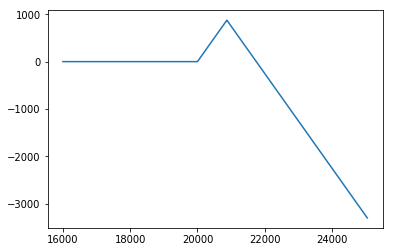

In [9]:
VBox([HBox([VBox(make_widgets(i)) for i in range(1, 3)]), button])